Multiple linear regression – Mao
Lasso – Mao
NN - Mao


consider:
1. transformation
2. standarization normorlization


In [1]:
# change directory
import os
os.getcwd()
os.chdir('./Data')

In [46]:

### for install packages
# !conda install numpy

import seaborn as sns
import pandas as pd
import numpy as np


# parallel computing
import multiprocessing
n_jobs = multiprocessing.cpu_count()-2



# metrics

from sklearn.metrics import mean_squared_error, r2_score

In [3]:
X_train = pd.read_csv('X_train.csv')
y_train = pd.read_csv('y_train.csv')

X_test = pd.read_csv('X_test.csv')
y_test = pd.read_csv('y_test.csv')


In [17]:
# define the prediction results from different model

preds = dict()

## Linear Model

Cite the folloiwng paper for package "statsmodels"

@inproceedings{seabold2010statsmodels,
  title={statsmodels: Econometric and statistical modeling with python},
  author={Seabold, Skipper and Perktold, Josef},
  booktitle={9th Python in Science Conference},
  year={2010},
}


warm-up reference
https://www.kirenz.com/post/2021-11-14-linear-regression-diagnostics-in-python/linear-regression-diagnostics-in-python/

### Assumptions Check
* Linear relationship.
* Multivariate normality.
* No or little multicollinearity.
* No auto-correlation.
* Homoscedasticity.

In [20]:
from sklearn.linear_model import LogisticRegression, LinearRegression, ElasticNet

reg_lin = LinearRegression().fit(X_train,y_train)

y_pred_lin = reg_lin.predict(X_test)
print(y_pred_lin)

preds['linear regression'] = y_pred_lin

[[0.6623476 ]
 [0.70503039]
 [0.69890844]
 ...
 [0.69305842]
 [0.66290783]
 [0.66108489]]


from itertools import chain
def flatten_chain(matrix):
    return list(chain.from_iterable(matrix))


y_pred = flatten_chain(y_pred)
print(y_pred)

In [12]:
mean_squared_error(y_test, y_pred)

0.00014484775086765942

In [21]:
# lasso

reg_lin_lasso = ElasticNet(random_state=0,l1_ratio=0.1).fit(X_train,y_train)

y_pred_lasso = reg_lin_lasso.predict(X_test)
print(y_pred_lasso)

preds['linear regression lasso'] = y_pred_lasso

[0.66437064 0.66437064 0.66437064 ... 0.66437064 0.66437064 0.66437064]


In [22]:
mean_squared_error(y_test, y_pred_lasso)

0.0008712945265892494

# MLP



reference for scoring-parameter: evaluation metric in cross validation

https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter

In [ ]:
from sklearn.neural_network import MLPRegressor


from sklearn.model_selection import GridSearchCV

param_grid_NN = {
    'hidden_layer_sizes': list(zip([500,1000,2000], [300, 500, 1000])),
    #'max_iter': [50, 100],
    #'activation': ['tanh', 'relu'],
    #'solver': ['sgd', 'adam'],
    #'alpha': [0.0001, 0.05],
    #'learning_rate': ['constant','adaptive'],
}


reg_NN = MLPRegressor(random_state=1, hidden_layer_sizes = (20, 20))

clf_cv_nn = GridSearchCV(reg_NN, param_grid_NN, scoring = "neg_root_mean_squared_error",  cv = 10, n_jobs = n_jobs)

y_pred_NN = CV_grid_results_nn= clf_cv_nn.fit(X_train, np.array(y_train))

print("best_params_: {},\n best_score_: {}".format(CV_grid_results_nn.best_params_, CV_grid_results_nn.best_score_))



In [78]:
y_pred_NN = CV_grid_results_nn.predict(X_test)
preds['MLP'] = y_pred_NN

mean_squared_error(y_test, y_pred_NN)

0.0002286297544450229

In [66]:
list(zip([1 ,2 ,3], [3 ,5 ,6]))

[(1, 3), (2, 5), (3, 6)]

In [ ]:


######  Train_target_prediction (this is used for elastc net)

Train_target_pre = CV_grid_results.predict(X)

reg_NN = MLPRegressor(random_state=1, hidden_layer_sizes = (20, 20)).fit(X_train, np.array(y_train))

y_pred_NN = reg_NN.predict(X_test)


preds['MLP'] = y_pred_NN

mean_squared_error(y_test, y_pred_NN)

In [30]:
from statsmodels.compat import lzip
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf

In [31]:
# add a const feature
X_train_linear_reg= sm.add_constant(X_train)
print(X_train_linear_reg)

       const        X1        X2        X3        X4        X5        X6  \
0        1.0  0.001131  0.884615  0.001120  0.001113  0.677632  0.841463   
1        1.0  0.001170  0.871795  0.001159  0.001152  0.703947  0.829268   
2        1.0  0.001326  0.884615  0.001198  0.001250  0.677632  0.853659   
3        1.0  0.014094  0.858974  0.001238  0.003926  0.697368  0.829268   
4        1.0  0.088109  0.858974  0.010766  0.029297  0.684211  0.853659   
...      ...       ...       ...       ...       ...       ...       ...   
15646    1.0  0.005049  0.910256  0.004676  0.004883  0.888158  0.939024   
15647    1.0  0.002456  0.884615  0.002417  0.002422  0.644737  0.865854   
15648    1.0  0.003821  0.935897  0.003615  0.003750  0.559211  0.890244   
15649    1.0  0.001287  0.897436  0.001277  0.001289  0.631579  0.853659   
15650    1.0  0.001267  0.935897  0.001238  0.001230  0.611842  0.890244   

             X7        X8        X9       X10       X11  
0      0.765152  0.787402  0.

In [38]:
reg_lin = sm.OLS(y_train,X_train_linear_reg).fit()

In [43]:
y_pred = reg_lin.predict(sm.add_constant(X_test))



mean_squared_error(y_pred,y_test)

0.00014484775086765896

In [32]:
reg_lin = sm.OLS(y_train,X_train_linear_reg).fit_regularized(L1_wt=1.0)

In [35]:
y_test = reg_lin.predict(sm.add_constant(X_test))
mean_squared_error(y_pred,y_test)

0.0005409097955507732

In [72]:
reg_lin = sm.OLS(y_train,X_train_linear_reg).fit()
print(reg_lin.params )

const   -0.014333
X1       0.093784
X2      -0.161030
X3       0.087370
X4      -0.174583
X5       0.201258
X6       0.921421
X7      -0.188616
X8       0.037791
X9      -0.052602
X10      0.012023
X11      0.055132
dtype: float64


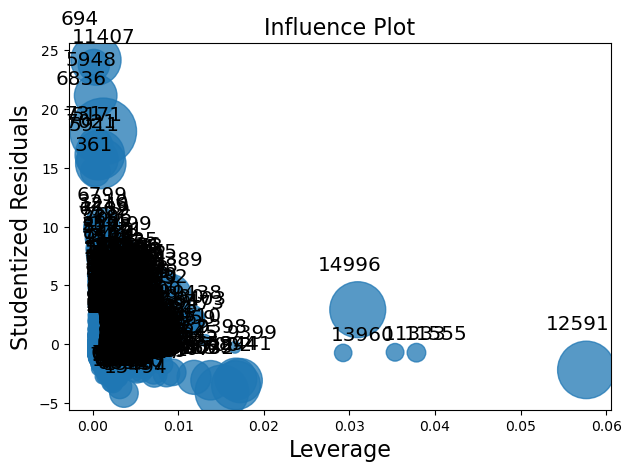

In [30]:
# Influence tests
fig = sm.graphics.influence_plot(reg_lin, criterion="cooks")
fig.tight_layout(pad=1.0)

#### Normality of the residuals
<span style='color:Red'> Fail </span>

In [37]:
# Jarque-Bera test:
name_norm_test = ["Jarque-Bera", "Chi^2 two-tail prob.", "Skew", "Kurtosis"]
norm_test = sms.jarque_bera(reg_lin.resid)
lzip(name_norm_test, norm_test)

[('Jarque-Bera', 4809643.659348884),
 ('Chi^2 two-tail prob.', 0.0),
 ('Skew', 5.4433685224489885),
 ('Kurtosis', 88.18696526674321)]

#### No auto-correlation.

 pass 

 Influence plots

fig = sm.graphics.influence_plot(lm, criterion="cooks")
fig.tight_layout(pad=1.0)

In [41]:
sm.stats.durbin_watson(reg_lin.resid)

1.7726215570049335